In [1]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
palette= sns.color_palette("pastel")


In [4]:
dim_dates = pd.read_csv("D:\\DA\\Projects\\CB 12\\RPC12_Input_For_Participants\\datasets\\dim_date.csv")
maker = pd.read_csv("D:\\DA\\Projects\\CB 12\\RPC12_Input_For_Participants\\datasets\\electric_vehicle_sales_by_makers.csv")
state = pd.read_csv("D:\\DA\\Projects\\CB 12\\RPC12_Input_For_Participants\\datasets\\electric_vehicle_sales_by_state.csv")

In [5]:
dim_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


# Initial Inspection

## Data Cleaning 
`dim_dates:`
- date column needs to be in datetime format

`electric_vehicle_sales_by_makers`:
- date column needs to be in datetime format

`electric_vehicle_sales_by_state`:
- date column needs to be in datetime format
- 'Andaman & Nicobar Island' and 'Andaman & Nicobar' are mentioned differently

## Inspections insights from columns

`dim_dates`:
- total data is for 36 months(3 years)
- fiscal year starts from April so april to june would be Q1 and so on
- No null values.

`electric_vehicle_sales_by_makers`:
- 2 and 4 wheeler vehicle are included
- Total 26 makers are producing the EV's in India 
- 44630 were the highest counts of EV's sold in a single month
- there are some months where not even a single Ev is sold

`electric_vehicle_sales_by_state`:
- There are total 35 states in the data
- There are states where not even a single EV is sold


In [6]:
def get_fiscal_year(date):
    if date.month >= 4:  
        return date.year + 1
    else:
        return date.year

In [7]:
def get_quarter(date):
    if date.month >=4 and date.month <=12 :
        return f'Q{date.quarter-1}'
    else:
         return f'Q{date.quarter+3}'

In [8]:
(
    dim_dates.
    assign(
        date = lambda x: pd.to_datetime(x.date),
        fiscal_year_checker = lambda x: x.date.apply(get_fiscal_year),
        quarter_checker = lambda x: x.date.apply(get_quarter) 
    )
    .query('(fiscal_year != fiscal_year_checker) or (quarter != quarter_checker)')
)

,date,fiscal_year,quarter,fiscal_year_checker,quarter_checker


`Confirmed all the rows of columns quarter and fiscal year is correct as per the given condition as the financial year starts from april in India`

In [9]:
maker["maker"].nunique()

26

In [10]:
maker["maker"].value_counts().sort_index()

maker
AMPERE                 36
ATHER                  36
BAJAJ                  36
BATTRE ELECTRIC        12
BEING                  24
BGAUSS                 12
BMW India              36
BYD India              36
HERO ELECTRIC          36
Hyundai Motor          36
JITENDRA               24
KIA Motors             36
KINETIC GREEN          12
MG Motor               36
Mahindra & Mahindra    36
Mercedes -Benz AG      36
OKAYA EV               24
OKINAWA                36
OLA ELECTRIC           36
OTHERS                 36
PCA Automobiles        36
PURE EV                24
REVOLT                 36
TVS                    36
Tata Motors            36
Volvo Auto India       36
Name: count, dtype: int64

In [11]:
maker["electric_vehicles_sold"].describe()

count      816.000000
mean      2531.998775
std       4771.077333
min          0.000000
25%         42.000000
50%        662.000000
75%       2636.500000
max      44630.000000
Name: electric_vehicles_sold, dtype: float64

In [12]:
pd.to_datetime(maker["date"]).describe()

count                    816
mean     2022-09-21 03:30:00
min      2021-04-01 00:00:00
25%      2022-01-01 00:00:00
50%      2022-10-01 00:00:00
75%      2023-07-01 00:00:00
max      2024-03-01 00:00:00
Name: date, dtype: object

In [13]:
pd.to_datetime(dim_dates["date"]).describe()

count                     36
mean     2022-09-15 18:40:00
min      2021-04-01 00:00:00
25%      2021-12-24 06:00:00
50%      2022-09-16 00:00:00
75%      2023-06-08 12:00:00
max      2024-03-01 00:00:00
Name: date, dtype: object

In [14]:
maker[maker["electric_vehicles_sold"] == 44630]

,date,vehicle_category,maker,electric_vehicles_sold
803,01-Mar-24,2-Wheelers,OLA ELECTRIC,44630


In [15]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [16]:
state["state"].nunique()

35

In [17]:
sorted(state["state"].unique())

['Andaman & Nicobar',
 'Andaman & Nicobar Island',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'DNH and DD',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [18]:
state['vehicle_category'].unique()

array(['2-Wheelers', '4-Wheelers'], dtype=object)

In [19]:
state['electric_vehicles_sold'].describe()

count     2445.000000
mean       845.035174
std       2185.167744
min          0.000000
25%          2.000000
50%         54.000000
75%        534.000000
max      26668.000000
Name: electric_vehicles_sold, dtype: float64

In [20]:
state['total_vehicles_sold'].describe()

count      2445.000000
mean      23402.966053
std       38353.266389
min           1.000000
25%        1158.000000
50%        6098.000000
75%       29396.000000
max      387983.000000
Name: total_vehicles_sold, dtype: float64

In [21]:
state["state"] = state['state'].replace("Andaman & Nicobar Island", "Andaman & Nicobar")

# EDA

## Primary Questions

###   List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.`

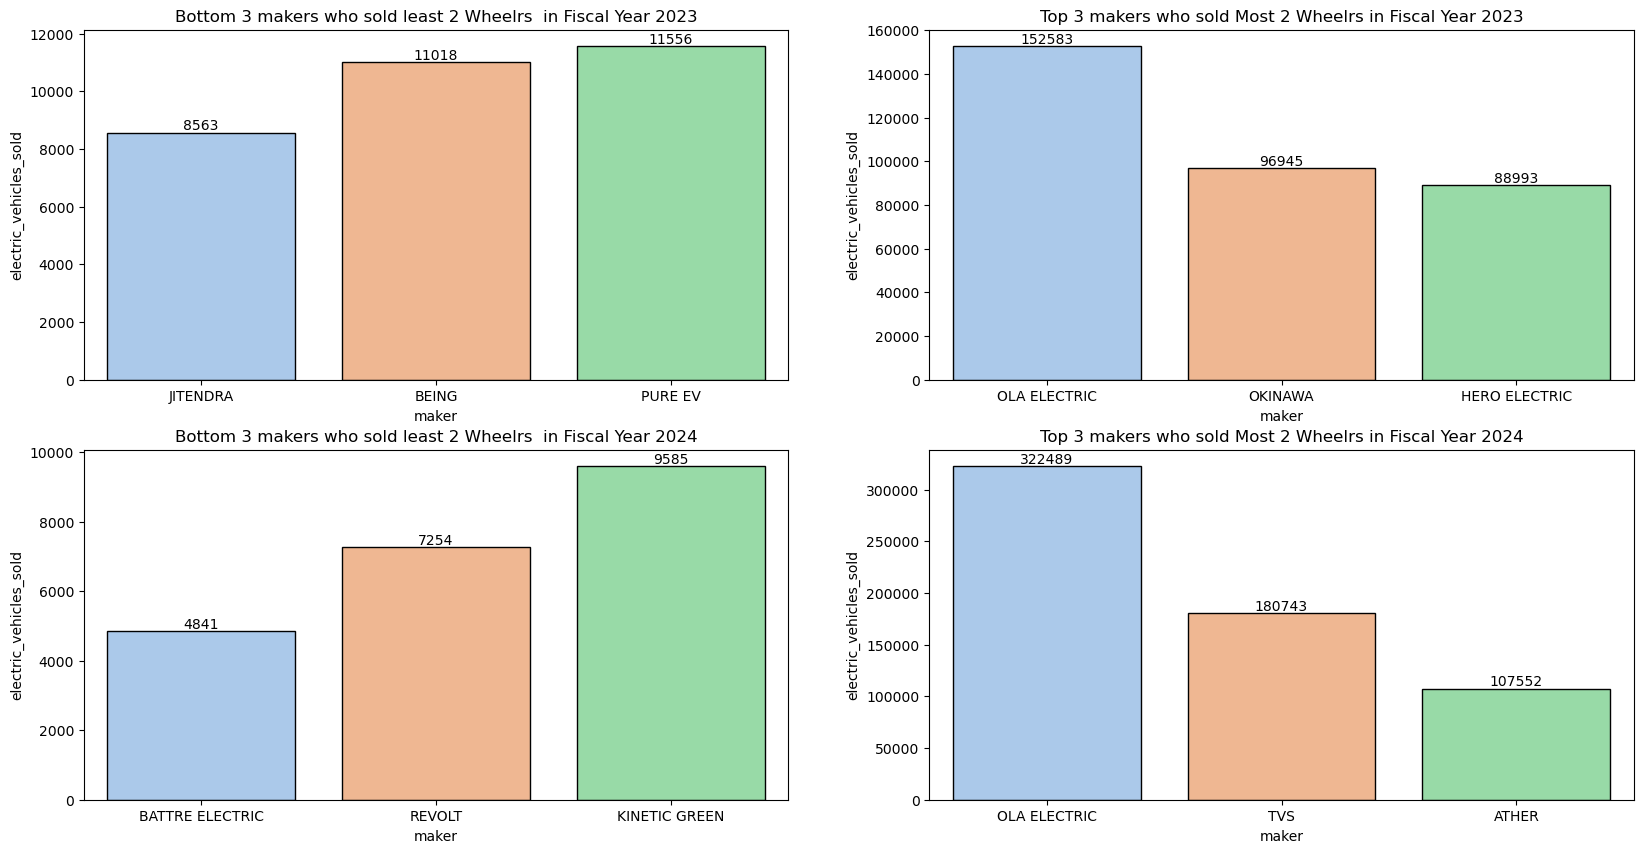

In [22]:
fig, ax = plt.subplots(2,2, figsize=(20,10))


for i, year in enumerate(['2023','2024']):
    total_2wheel_ev_in_year = (
        maker
        .merge(dim_dates, on ="date")
        .query(f'fiscal_year == {year} and vehicle_category == "2-Wheelers"')
        .groupby(['maker'])["electric_vehicles_sold"].sum()
        .sort_values()
    )

    bottom_3, top_3 = total_2wheel_ev_in_year.head(3), total_2wheel_ev_in_year.tail(3).sort_values(ascending=False)

    bar = sns.barplot(x =bottom_3.index, y=bottom_3, edgecolor="k", palette=palette, ax=ax[i,0])
    ax[i,0].set_title(f"Bottom 3 makers who sold least 2 Wheelrs  in Fiscal Year {year}")
    for bar_ in bar.containers:
        bar.bar_label(bar_)

    bar = sns.barplot(x =top_3.index, y=top_3, edgecolor="k", palette=palette, ax=ax[i,1])
    ax[i,1].set_title(f"Top 3 makers who sold Most 2 Wheelrs in Fiscal Year {year}")
    for bar_ in bar.containers:
        bar.bar_label(bar_)
    
plt.savefig('ev_sales_transparent.png', transparent=True)

plt.show()   

- In comparison to  2023 ola Eletric Sold twice the 2 wheelers EV indicating the potential aggressive marketing
- Onikawa and Hero Electric has been over taken by TVS and ATHER as the new entries in the top 3 list
- Competitors like OLA electric have made it difficult for new or small makers 

### Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024

In [23]:
penetration_rate = (
    state.merge(dim_dates, on ="date")
    .query('fiscal_year == 2024')
    .groupby(['state', 'vehicle_category'])
    .agg({'electric_vehicles_sold': 'sum', 'total_vehicles_sold': 'sum'})
    .reset_index()
    .assign(
        penetration_rate = lambda x: (x["electric_vehicles_sold"] / x["total_vehicles_sold"])*100
    )
)


In [24]:
penetration_rate

,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,Andaman & Nicobar,2-Wheelers,20,5249,0.381025
1,Andaman & Nicobar,4-Wheelers,15,1954,0.767656
2,Andhra Pradesh,2-Wheelers,31353,694105,4.517040
3,Andhra Pradesh,4-Wheelers,1830,88760,2.061740
4,Arunachal Pradesh,2-Wheelers,3,14673,0.020446
...,...,...,...,...,...
63,Uttar Pradesh,4-Wheelers,5245,407195,1.288081
64,Uttarakhand,2-Wheelers,5775,175010,3.299811
65,Uttarakhand,4-Wheelers,561,58101,0.965560
66,West Bengal,2-Wheelers,14016,855595,1.638158


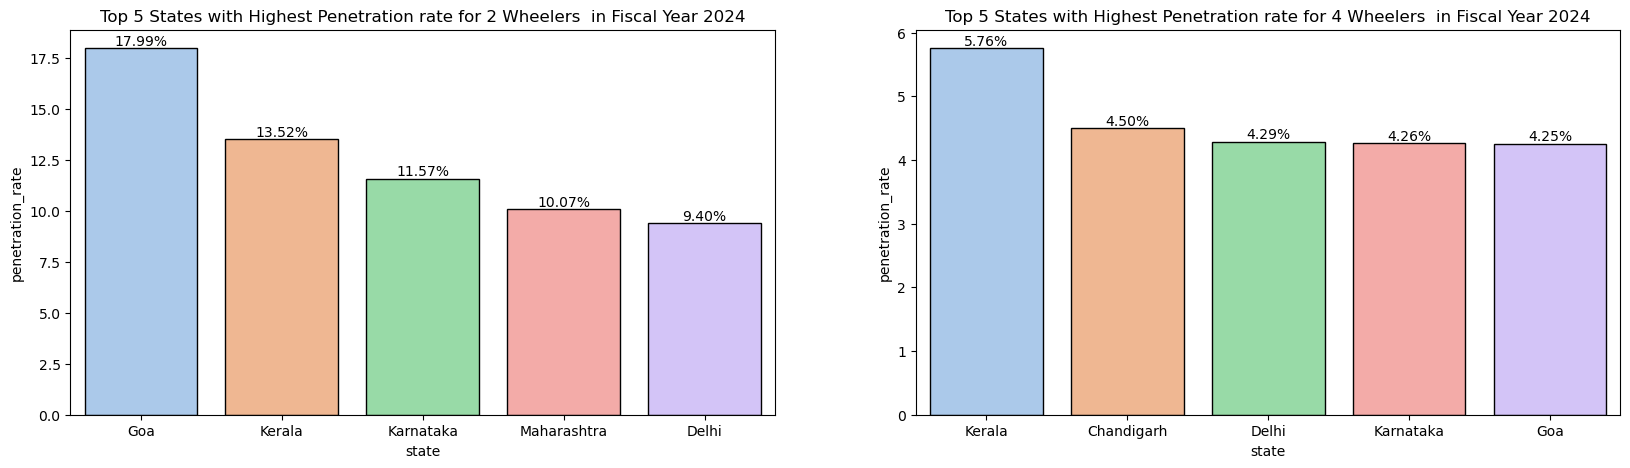

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
top_5_2 = penetration_rate.query('vehicle_category == "2-Wheelers"').sort_values(by="penetration_rate", ascending=False).head()
top_5_4 = penetration_rate.query('vehicle_category == "4-Wheelers"').sort_values(by="penetration_rate", ascending=False).head()


bar = sns.barplot(data =top_5_2,
                  x ='state', y='penetration_rate', edgecolor="k", palette=palette, ax=ax[0])
ax[0].set_title(f"Top 5 States with Highest Penetration rate for 2 Wheelers  in Fiscal Year {year}")
for bar_ in bar.containers:
    bar.bar_label(bar_, fmt="%.2f%%")
    
    
bar = sns.barplot(data =top_5_4,
                  x ='state', y='penetration_rate', edgecolor="k", palette=palette, ax=ax[1])
ax[1].set_title(f"Top 5 States with Highest Penetration rate for 4 Wheelers  in Fiscal Year {year}")
for bar_ in bar.containers:
    bar.bar_label(bar_, fmt="%.2f%%")

- Goa, karnataka, kerla and Delhi are the states where the penetrartion Rate is higher for both categories
- in maharashtra 2 wheeelers is more penetrated wheres in chandigarh 4 wheelers is more penetrated

### List the states with negative penetration (decline) in EV sales from 2022 to 2024? 

In [26]:
penetration_rate_pivot = (
    state.merge(dim_dates, on="date")
    .query('fiscal_year in [2022, 2024]')
    .groupby(['state', 'fiscal_year'])
    .agg({'electric_vehicles_sold': 'sum', 'total_vehicles_sold': 'sum'})
    .assign(
        penetration_rate=lambda x: (x["electric_vehicles_sold"] / x["total_vehicles_sold"]) * 100
    )
    .reset_index()
    .pivot(index='state', columns='fiscal_year', values="penetration_rate")
)

def highlight_2024(column):

    style = pd.Series("", index=column.index)
    
    if 2022 in penetration_rate_pivot.columns and 2024 in penetration_rate_pivot.columns:
        for idx in column.index:
            if penetration_rate_pivot.loc[idx, 2024] > penetration_rate_pivot.loc[idx, 2022]:
                style.loc[idx] = 'background-color: green'
            elif penetration_rate_pivot.loc[idx, 2024] < penetration_rate_pivot.loc[idx, 2022]:
                style.loc[idx] = 'background-color: red'
    
    return style

penetration_rate_pivot.sort_values(by=2024, ascending=False).style.apply(highlight_2024, subset=[2024])




fiscal_year,2022,2024
state,,
Goa,3.675680,13.752483
Kerala,1.977885,11.586958
Karnataka,4.277335,10.176373
Maharashtra,2.901856,8.595009
Delhi,4.117896,7.705806
Chandigarh,1.112194,6.372516
Odisha,1.980702,6.328248
Chhattisgarh,1.161754,5.673189
Tamil Nadu,2.740709,5.493145


### What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?


In [27]:
top_5_sales_volume_maker = (
    maker.merge(dim_dates, on="date")
    .query('vehicle_category == "4-Wheelers"')
    .groupby(['maker'])["electric_vehicles_sold"].sum()
    .sort_values(ascending=False)
    .reset_index()
    .head()
    ["maker"]
    .to_list()
)


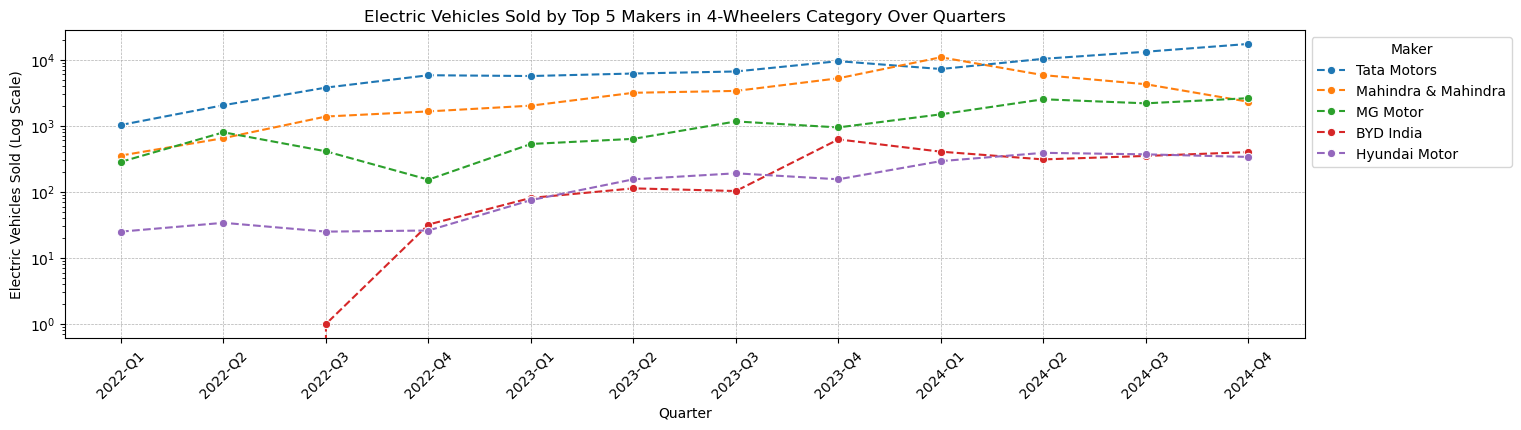

In [28]:
plt.figure(figsize=(16, 4))
for maker_ in top_5_sales_volume_maker:
    filtered_data = (
        maker.merge(dim_dates, on="date")
        .query(f'maker == "{maker_}" and vehicle_category == "4-Wheelers"')
        .groupby(['fiscal_year', 'quarter'])["electric_vehicles_sold"].sum()
        .reset_index()
    )
    
    filtered_data['time'] = filtered_data['fiscal_year'].astype(str)+ "-" + filtered_data['quarter'].astype(str)
    sns.lineplot(data=filtered_data, x='time', y='electric_vehicles_sold', label=maker_, marker='o',linestyle='--')

plt.title("Electric Vehicles Sold by Top 5 Makers in 4-Wheelers Category Over Quarters")
plt.xlabel("Quarter")
plt.ylabel("Electric Vehicles Sold (Log Scale)")
plt.yscale('log')
plt.legend(title='Maker', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

### How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?


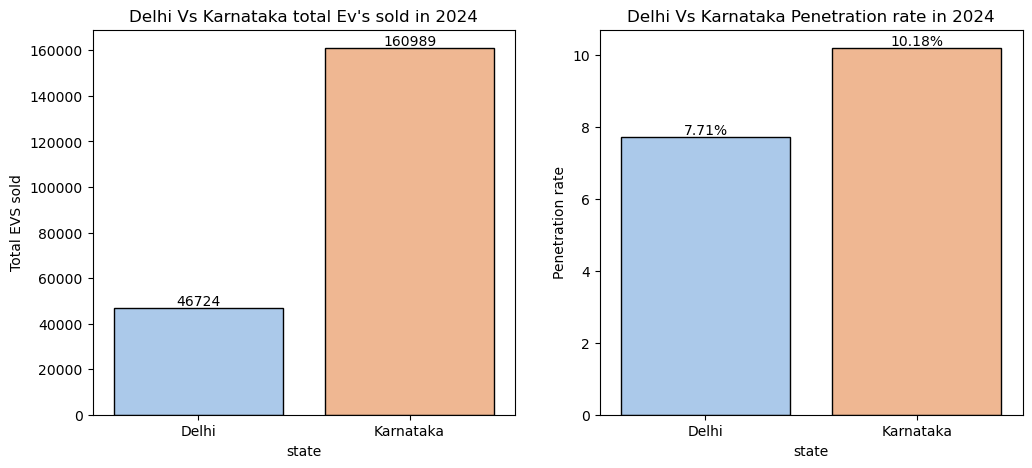

In [29]:
delhi_karnataka_24 = (
    state
    .merge(dim_dates, on ="date")
    .query(
        'state in ["Delhi", "Karnataka"] and fiscal_year == 2024'
    )
    .groupby(["state"])
    .agg({"electric_vehicles_sold":'sum', "total_vehicles_sold":"sum"})
    .assign(
        penetration_rate = lambda x: np.round((x['electric_vehicles_sold']/x['total_vehicles_sold'])*100,2)
    )
    .reset_index()
)

fig, ax = plt.subplots(1,2, figsize=(12,5))

bar = sns.barplot(data=delhi_karnataka_24, x="state", y="electric_vehicles_sold", ci=None, palette=palette, 
                  estimator="sum",edgecolor="k", ax=ax[0])

ax[0].set_title("Delhi Vs Karnataka total Ev's sold in 2024")
ax[0].set_ylabel("Total EVS sold")
for i in bar.containers:
    bar.bar_label(i)
    
    
bar = sns.barplot(data=delhi_karnataka_24, x="state", y="penetration_rate", ci=None, palette=palette, edgecolor="k", ax=ax[1])

ax[1].set_title("Delhi Vs Karnataka Penetration rate in 2024")
ax[1].set_ylabel("Penetration rate")
for i in bar.containers:
    bar.bar_label(i,fmt=f'%.2f%%')

### . List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [30]:
top_5_sales_volume_maker

['Tata Motors',
 'Mahindra & Mahindra',
 'MG Motor',
 'BYD India',
 'Hyundai Motor']

In [31]:
CAGR = (
    maker.merge(dim_dates, on="date")
    .query('vehicle_category == "4-Wheelers" and maker in @top_5_sales_volume_maker')
    .groupby(['maker', 'fiscal_year'])["electric_vehicles_sold"].sum()
    .unstack(fill_value=0)
    .assign(
        cagr = lambda x: ((x[2024]/x[2022])**(1/2)-1) *100
    )
    .style.background_gradient(axis=0)  
)

CAGR

fiscal_year,2022,2023,2024,cagr
maker,,,,
BYD India,33,920,1466,566.515134
Hyundai Motor,110,576,1390,255.476633
MG Motor,1647,3277,8829,131.530899
Mahindra & Mahindra,4042,13805,23346,140.330055
Tata Motors,12708,28046,48181,94.714952


### List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [32]:
(
    state
    .merge(dim_dates, on="date")
    .groupby(["state", "fiscal_year"])["total_vehicles_sold"].sum()
    .unstack(fill_value=0)
    .assign(
        cagr= lambda x: ((x[2024]/x[2022])**(1/3)-1)*100
    )
    .sort_values(by="cagr", ascending=False)
    .head(10)
    ["cagr"]
    .reset_index()
    .style.background_gradient(axis=0)
)

,state,cagr
0,Meghalaya,18.176847
1,Goa,17.526587
2,Karnataka,16.215157
3,Delhi,14.726667
4,Rajasthan,13.861773
5,Gujarat,13.266399
6,Assam,13.008168
7,Mizoram,12.152356
8,Arunachal Pradesh,11.857399
9,Andaman & Nicobar,11.847159


### What are the peak and low season months for EV sales based on the data from 2022 to 2024?

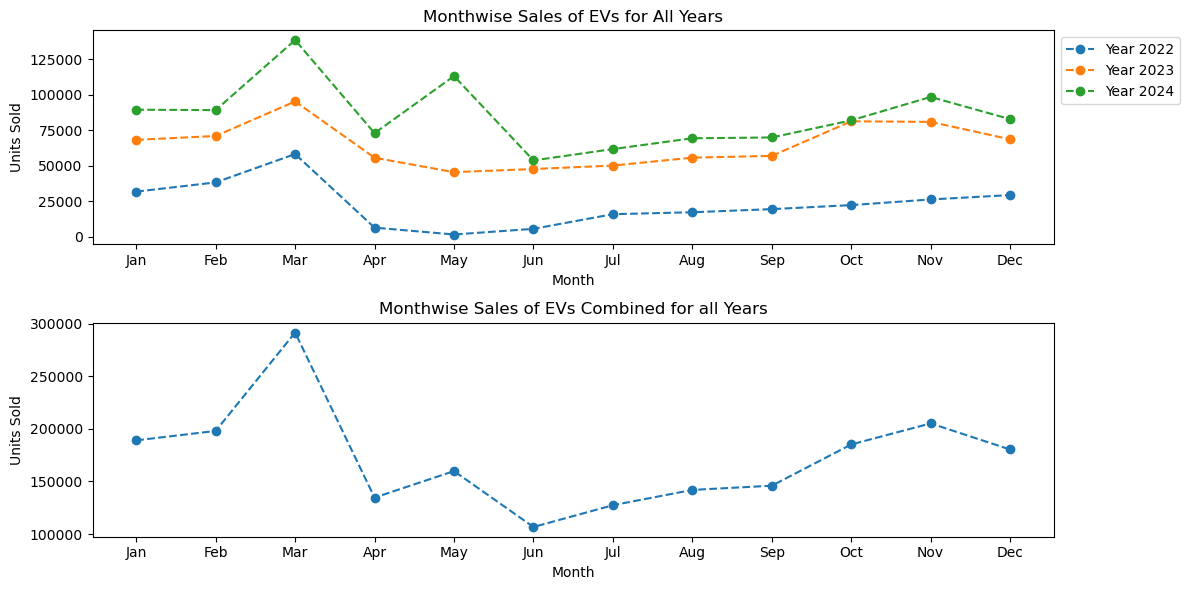

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

for i in [2022, 2023, 2024]:
    (
        dim_dates
        .merge(state, on="date")
        .query(f'fiscal_year == {i}')
        .assign(
            date=lambda x: pd.to_datetime(x.date),
            month=lambda x: x["date"].dt.month
        )
        .groupby(["month"])["electric_vehicles_sold"].sum()
        .plot(marker="o", linestyle="--", label=f'Year {i}', ax=ax[0])
    )

ax[0].set_xticks(
    ticks=range(1, 13), 
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].set_title("Monthwise Sales of EVs for All Years")
ax[0].set_ylabel("Units Sold")
ax[0].set_xlabel("Month")

(
    dim_dates
    .merge(state, on="date")
    .assign(
        date=lambda x: pd.to_datetime(x.date),
        month=lambda x: x["date"].dt.month
    )
    .groupby(["month"])["electric_vehicles_sold"].sum()
    .plot(marker="o", linestyle="--", ax=ax[1])
)

ax[1].set_xticks(
    ticks=range(1, 13), 
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
ax[1].set_title("Monthwise Sales of EVs Combined for all Years")
ax[1].set_ylabel("Units Sold")
ax[1].set_xlabel("Month")

plt.tight_layout()
plt.show()

### What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [34]:
top_10_states_by_penetration_rate = (
    state
    .merge(dim_dates, on="date")
    .groupby(["state"]).agg({'electric_vehicles_sold':"sum", "total_vehicles_sold":"sum"})
    .reset_index()
    .assign(
        penetration_rate = lambda x: (x.electric_vehicles_sold / x.total_vehicles_sold)*100
    )
    .sort_values(by='penetration_rate', ascending=False)
    .head(10)
    ["state"].unique().tolist()
)

In [35]:
(
    state
    .merge(dim_dates, on="date")
    .query('state in @top_10_states_by_penetration_rate')
    .groupby(['state', "fiscal_year"])["electric_vehicles_sold"].sum()
    .unstack()
    .assign(
        cagr= lambda x: ((x[2024]/x[2022])**(1/3)-1)*100,
        projected_sales_2030 = lambda x : (x[2024] * (1 + (x.cagr)/100)**(6) ).astype(int)
    ).style.background_gradient(subset=["cagr","projected_sales_2030"])
)

fiscal_year,2022,2023,2024,cagr,projected_sales_2030
state,,,,,
Chandigarh,411,1991,2877,91.293118,140972
Delhi,16535,44053,46724,41.376949,373088
Goa,1778,7107,10799,82.452826,398370
Gujarat,18026,79004,84359,67.267161,1847547
Karnataka,43111,108895,160989,55.144375,2244979
Kerala,13639,49483,73938,75.668971,2172891
Maharashtra,48374,150502,197169,59.738234,3275607
Odisha,9498,29651,39118,60.293099,663537
Rajasthan,20087,63835,66444,48.997928,727004


### Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. H

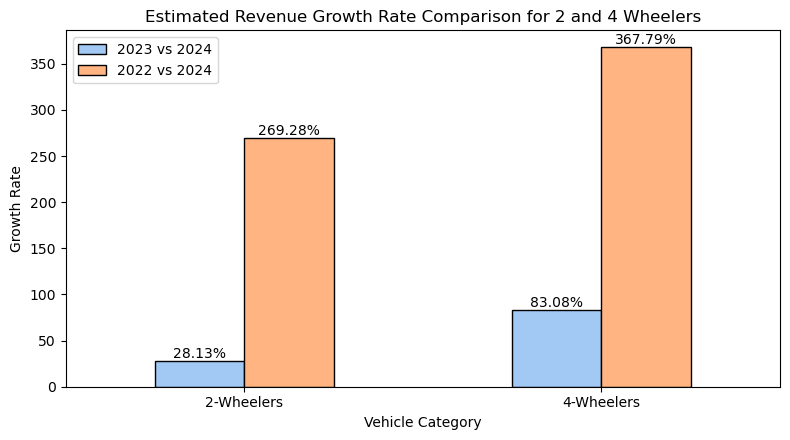

In [36]:
'''
    Assuming an average unit price H, which we can take any arbitrary number for reference but still output the same 
    estimated growth rate
'''
average_price_2w = 85000
average_price_4w = 1500000
fig, ax = plt.subplots(figsize=(8, 4.5))
bar = (
    state.merge(
        dim_dates, on="date"
    )
    .groupby(['vehicle_category','fiscal_year'])["electric_vehicles_sold"].sum()
    .unstack()
    .reset_index()
    .assign(
        revenue_for_2022 = lambda x: np.where(x['vehicle_category'] =='2-Wheelers', x[2022] * average_price_2w,
                                             x[2022] * average_price_4w),
        revenue_for_2023 = lambda x: np.where(x['vehicle_category'] =='2-Wheelers', x[2023] * average_price_2w,
                                             x[2023] * average_price_4w),
        revenue_for_2024 = lambda x: np.where(x['vehicle_category'] =='2-Wheelers', x[2024] * average_price_2w,
                                             x[2024] * average_price_4w),
        
        growth_rate_2022_2024 = lambda x: np.round((x["revenue_for_2024"]/x['revenue_for_2022'] - 1)*100,2),
        growth_rate_2023_2024 = lambda x: np.round((x["revenue_for_2024"]/x['revenue_for_2023'] - 1)*100,2),
    )
    [['vehicle_category', 'growth_rate_2023_2024', 'growth_rate_2022_2024']]
    .set_index('vehicle_category')
    .plot(kind="bar", color=palette, edgecolor="k", ax=ax)

)

ax.legend(labels=["2023 vs 2024","2022 vs 2024"], title="", loc="upper left")

ax.set_title("Estimated Revenue Growth Rate Comparison for 2 and 4 Wheelers")
ax.set_xlabel("Vehicle Category")
ax.set_ylabel('Growth Rate')
plt.xticks(rotation=0)
for i in bar.containers:
    bar.bar_label(i, fmt='%.2f%%');
    
plt.tight_layout()
plt.show()

In [37]:
dim_dates.merge(state, on ="date")

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,2022,Q1,Sikkim,2-Wheelers,0,398
1,01-Apr-21,2022,Q1,Sikkim,4-Wheelers,0,361
2,01-Apr-21,2022,Q1,Andaman & Nicobar,2-Wheelers,0,515
3,01-Apr-21,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,01-Apr-21,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724
...,...,...,...,...,...,...,...
2440,01-Mar-24,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,2024,Q4,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,2024,Q4,Andaman & Nicobar,2-Wheelers,2,447
